<h1>Project 10</h1>

<h2>Agriculture Dataset</h2>

<img src="https://cdn.pixabay.com/photo/2016/03/29/08/48/project-1287781_1280.jpg">

***First importing necessary packages***

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
sns.set()
import warnings
warnings.filterwarnings("ignore")

***Importing data which is in xlsx format***

In [2]:
train=pd.read_excel('train_agriculture.xlsx')
train.head()

,ID,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage
0,F00000001,188,1,0,1,0,0.0,0,1,0
1,F00000003,209,1,0,1,0,0.0,0,2,1
2,F00000004,257,1,0,1,0,0.0,0,2,1
3,F00000005,257,1,1,1,0,0.0,0,2,1
4,F00000006,342,1,0,1,0,0.0,0,2,1


In [3]:
test=pd.read_excel('test_agriculture.xlsx')
test.head()

,ID,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season
0,F00000002,188,1,1,1,0,NaN,0,2
1,F00000007,410,1,1,1,0,0.0,0,2
2,F00000011,626,1,0,1,0,0.0,0,2
3,F00000013,731,1,0,1,0,0.0,0,2
4,F00000014,789,0,0,1,0,0.0,0,1


The train and test data are given separately lets keep it that way, we will do our EDA process only on the train data and test our model on the test data

Before all this we will handle the Nan values in both the data

<h2>Start of EDA process</h2>

***Checking shape of the Dataset***

In [4]:
print('Shape of training set is',train.shape)
print('Shape of testing set is',test.shape)

Shape of training set is (4599, 10)
Shape of testing set is (1199, 9)


Testing set is missing the column Crop_Damage which is our target variable and this is what we are going to predict in this project

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4599 entries, 0 to 4598
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       4599 non-null   object 
 1   Estimated_Insects_Count  4599 non-null   int64  
 2   Crop_Type                4599 non-null   int64  
 3   Soil_Type                4599 non-null   int64  
 4   Pesticide_Use_Category   4599 non-null   int64  
 5   Number_Doses_Week        4599 non-null   int64  
 6   Number_Weeks_Used        4157 non-null   float64
 7   Number_Weeks_Quit        4599 non-null   int64  
 8   Season                   4599 non-null   int64  
 9   Crop_Damage              4599 non-null   int64  
dtypes: float64(1), int64(8), object(1)
memory usage: 359.4+ KB


In [6]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1199 entries, 0 to 1198
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       1199 non-null   object 
 1   Estimated_Insects_Count  1199 non-null   int64  
 2   Crop_Type                1199 non-null   int64  
 3   Soil_Type                1199 non-null   int64  
 4   Pesticide_Use_Category   1199 non-null   int64  
 5   Number_Doses_Week        1199 non-null   int64  
 6   Number_Weeks_Used        1080 non-null   float64
 7   Number_Weeks_Quit        1199 non-null   int64  
 8   Season                   1199 non-null   int64  
dtypes: float64(1), int64(7), object(1)
memory usage: 84.4+ KB


Number_Weeks_Used has many missing values in both our train and test data, we are going to drop this column as it will affect out prediction, we will drop ID as well as it is just a numberto identity and nothing else

In [7]:
df=train[['Estimated_Insects_Count','Crop_Type','Soil_Type','Pesticide_Use_Category','Number_Doses_Week','Number_Weeks_Quit','Season','Crop_Damage']]
test=test[['Estimated_Insects_Count','Crop_Type','Soil_Type','Pesticide_Use_Category','Number_Doses_Week','Number_Weeks_Quit','Season']]
df.head()

,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Quit,Season,Crop_Damage
0,188,1,0,1,0,0,1,0
1,209,1,0,1,0,0,2,1
2,257,1,0,1,0,0,2,1
3,257,1,1,1,0,0,2,1
4,342,1,0,1,0,0,2,1


We now have a complete dataset that we can do our analysis

***Lets visualize our data***

(array([ 692., 1019.,  889.,  670.,  490.,  357.,  230.,  102.,  108.,
          42.]),
 array([ 150. ,  544.7,  939.4, 1334.1, 1728.8, 2123.5, 2518.2, 2912.9,
        3307.6, 3702.3, 4097. ]),
 <a list of 10 Patch objects>)

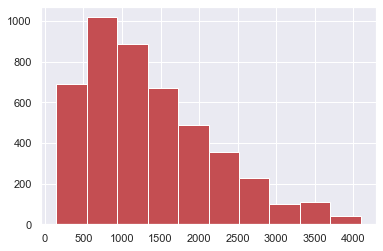

In [8]:
plt.hist(df['Estimated_Insects_Count'],color='r')

(array([2015.,  639.,  656.,  418.,  429.,  224.,  121.,   62.,   28.,
           7.]),
 array([ 0. ,  4.7,  9.4, 14.1, 18.8, 23.5, 28.2, 32.9, 37.6, 42.3, 47. ]),
 <a list of 10 Patch objects>)

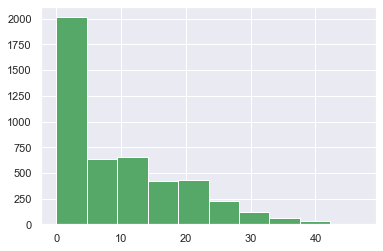

In [9]:
plt.hist(df['Number_Weeks_Quit'],color='g')

AxesSubplot(0.125,0.125;0.775x0.755)


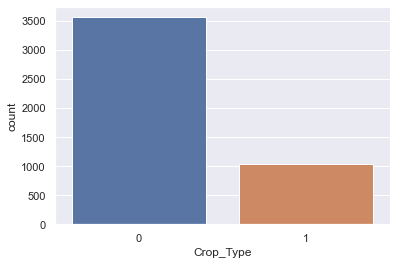

AxesSubplot(0.125,0.125;0.775x0.755)


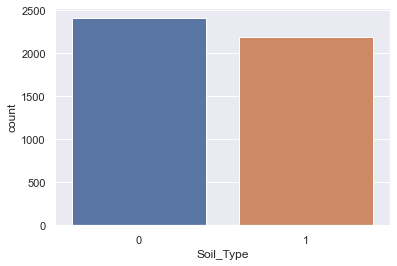

AxesSubplot(0.125,0.125;0.775x0.755)


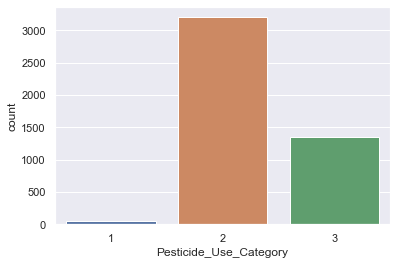

AxesSubplot(0.125,0.125;0.775x0.755)


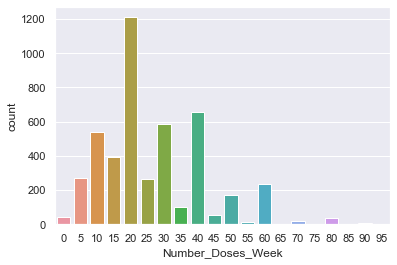

AxesSubplot(0.125,0.125;0.775x0.755)


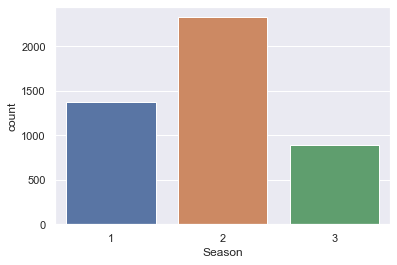

AxesSubplot(0.125,0.125;0.775x0.755)


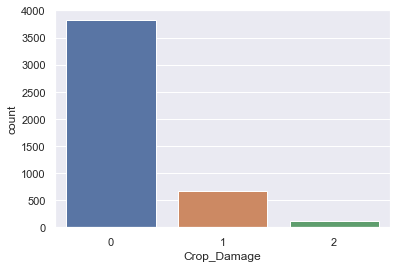

In [10]:
col=['Crop_Type','Soil_Type','Pesticide_Use_Category','Number_Doses_Week','Season','Crop_Damage']

for i in range(0,6):
    print(sns.countplot(df[col[i]]))
    plt.show()

***Lets check for outliers***

*First we will check for outliers visually for each attributes, for this box plot is the best option*

AxesSubplot(0.125,0.125;0.775x0.755)


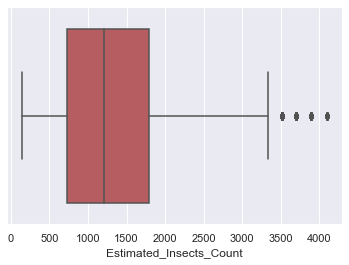

AxesSubplot(0.125,0.125;0.775x0.755)


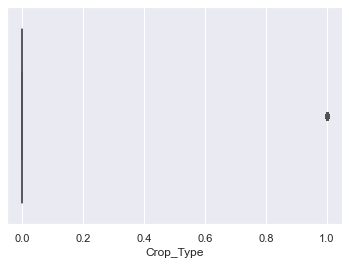

AxesSubplot(0.125,0.125;0.775x0.755)


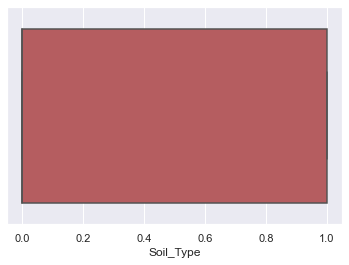

AxesSubplot(0.125,0.125;0.775x0.755)


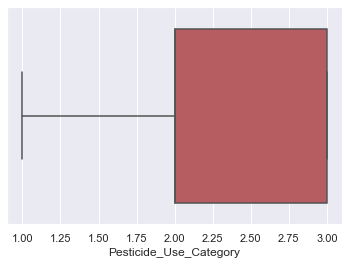

AxesSubplot(0.125,0.125;0.775x0.755)


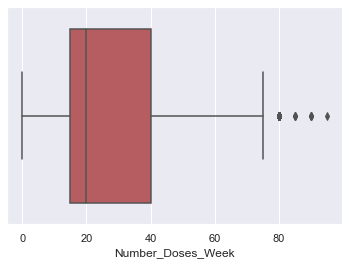

AxesSubplot(0.125,0.125;0.775x0.755)


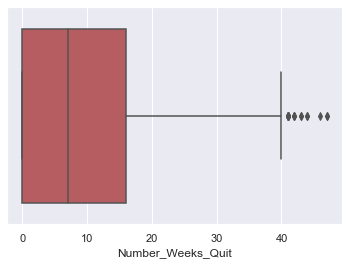

AxesSubplot(0.125,0.125;0.775x0.755)


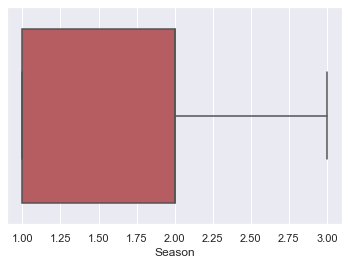

AxesSubplot(0.125,0.125;0.775x0.755)


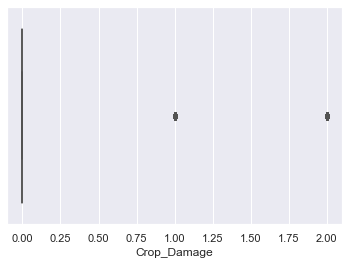

In [11]:
col=['Estimated_Insects_Count','Crop_Type','Soil_Type','Pesticide_Use_Category','Number_Doses_Week','Number_Weeks_Quit','Season','Crop_Damage']
for i in range(0,8):
    print(sns.boxplot(df[col[i]],color='r'))
    plt.show()

Majority of the features we have are categorical and the rest are continuously increasing data over a period of time, so we are not going to handle the outliers in this as it is not helpful

***Lets calculate correlation***

In [12]:
df.corr()

,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Quit,Season,Crop_Damage
Estimated_Insects_Count,1.000000,-0.036911,-0.151796,-0.027111,-0.122509,0.246719,-0.009482,0.202312
Crop_Type,-0.036911,1.000000,-0.175019,0.349662,-0.163832,-0.273475,-0.000549,0.021772
Soil_Type,-0.151796,-0.175019,1.000000,0.021661,0.050099,-0.034355,0.011052,-0.059481
Pesticide_Use_Category,-0.027111,0.349662,0.021661,1.000000,-0.005985,-0.569467,0.008487,0.199195
Number_Doses_Week,-0.122509,-0.163832,0.050099,-0.005985,1.000000,-0.032381,-0.003768,-0.018363
Number_Weeks_Quit,0.246719,-0.273475,-0.034355,-0.569467,-0.032381,1.000000,0.004861,-0.152918
Season,-0.009482,-0.000549,0.011052,0.008487,-0.003768,0.004861,1.000000,-0.016196
Crop_Damage,0.202312,0.021772,-0.059481,0.199195,-0.018363,-0.152918,-0.016196,1.000000


***Lets visualize using heat map as well***

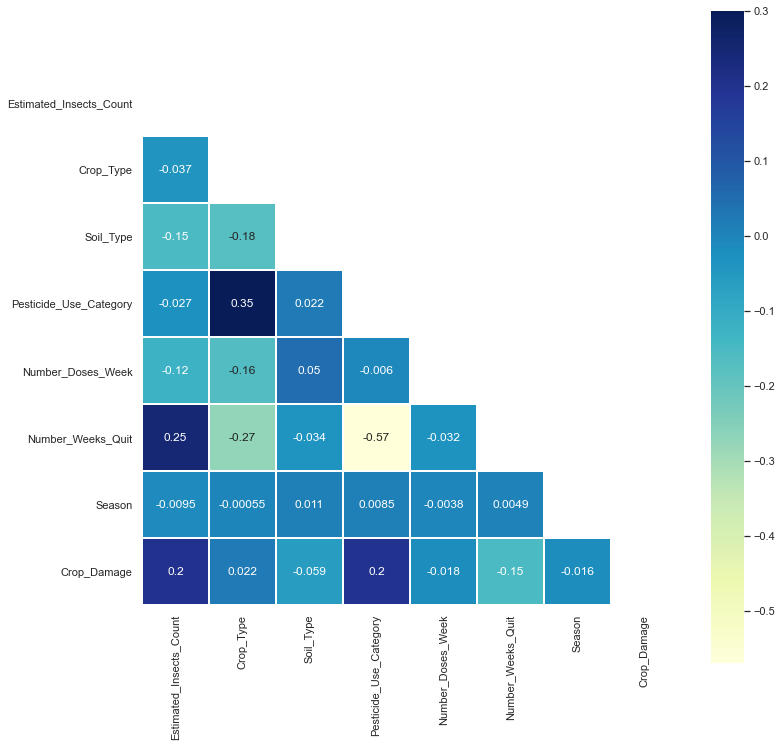

In [13]:
corr = df.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(12, 12))
    ax = sns.heatmap(corr, mask=mask, vmax=.3, square=True,annot=True, linewidths=0.5,cmap="YlGnBu")

***Lets separate our input and output varibale***

In [14]:
x=df[['Estimated_Insects_Count','Crop_Type','Soil_Type','Pesticide_Use_Category','Number_Doses_Week','Number_Weeks_Quit','Season']]
x.head()

,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Quit,Season
0,188,1,0,1,0,0,1
1,209,1,0,1,0,0,2
2,257,1,0,1,0,0,2
3,257,1,1,1,0,0,2
4,342,1,0,1,0,0,2


In [15]:
y=df[['Crop_Damage']]
y.head()

,Crop_Damage
0,0
1,1
2,1
3,1
4,1


We have both of input and output attributes cleaned and in desired format

<h2>End of EDA Process</h2>

Lets start Building models to make predictions and find the model that works best on our dataset

<h2>Start of Machine Learning Process</h2>

Since out target variable is multivariant, we are going to do classification analysis

***Lets import required packages***

In [16]:
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

In [17]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)

In [18]:
KNN=KNeighborsClassifier(n_neighbors=6)
SV=SVC()
LR=LogisticRegression()
MNB=MultinomialNB()
DT=DecisionTreeClassifier(random_state=6)

In [19]:
models = []
models.append(('KNeighborsClassifier', KNN))
models.append(('SVC', SV))
models.append(('LogisticRegression', LR))
models.append(('DecisionTreeClassifier', DT))
models.append(('MultinomialNB',MNB))

***Lets create a loop that will execute all our models***

In [20]:
Model = []
score = []
cvs=[]
for name,model in models:
    print('*-----------------------------*',name,'*------------------------------*')
    print('\n')
    Model.append(name)
    model.fit(x_train,y_train)
    print(model)
    pre=model.predict(x_test)
    print('\n')
    AS=accuracy_score(y_test,pre)
    print('Accuracy_score = ',AS*100)
    score.append(AS*100)
    print('\n')
    sc = cross_val_score(model, x, y, cv=10, scoring='accuracy').mean()
    print('Cross_Val_Score = ',sc*100)
    cvs.append(sc*100)
    print('\n')
    print('classification_report\n',classification_report(y_test,pre))
    print('\n\n')

*-----------------------------* KNeighborsClassifier *------------------------------*


KNeighborsClassifier(n_neighbors=6)


Accuracy_score =  82.89855072463767


Cross_Val_Score =  81.30060623283129


classification_report
               precision    recall  f1-score   support

           0       0.84      0.98      0.91      1147
           1       0.45      0.11      0.17       198
           2       0.00      0.00      0.00        35

    accuracy                           0.83      1380
   macro avg       0.43      0.36      0.36      1380
weighted avg       0.76      0.83      0.78      1380




*-----------------------------* SVC *------------------------------*


SVC()


Accuracy_score =  83.11594202898551


Cross_Val_Score =  83.06157052192857


classification_report
               precision    recall  f1-score   support

           0       0.83      1.00      0.91      1147
           1       0.00      0.00      0.00       198
           2       0.00      0.00      0.00     

In [21]:
result = pd.DataFrame({'Classification Model': Model, 'Accuracy score': score ,'Cross Validation Score':cvs})
result

,Classification Model,Accuracy score,Cross Validation Score
0,KNeighborsClassifier,82.898551,81.300606
1,SVC,83.115942,83.061571
2,LogisticRegression,83.188406,82.257270
3,DecisionTreeClassifier,75.217391,68.667803
4,MultinomialNB,64.565217,64.299091


**We are going to choose SVC as our final model as it is giving highest accuracy with good cross validation score**

<h2>End of Machine learning Process</h2>


<h1>Now lets save our final model</h1>

In [22]:
import joblib
joblib.dump(SVC,'Agriculture.pkl')

['Agriculture.pkl']

<h2>Prediction on Test set</h2>

In [23]:
test.head()

,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Quit,Season
0,188,1,1,1,0,0,2
1,410,1,1,1,0,0,2
2,626,1,0,1,0,0,2
3,731,1,0,1,0,0,2
4,789,0,0,1,0,0,1


In [24]:
Test_result=SV.predict(test)
Test_result

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

***Lets convert our result to dataframe and save in csv format***

In [25]:
Result=pd.DataFrame(Test_result,columns =["Crop_Damage"])
Result.head()

,Crop_Damage
0,0
1,0
2,0
3,0
4,0


In [26]:
Result.to_csv('Crop_Damage_Predict.csv') 

<img src="https://knowledge.wharton.upenn.edu/wp-content/uploads/2020/05/Women-in-data-science.jpg">